In [397]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation
import warnings
import os
import cv2

In [398]:
# đường dẫn đến thư mục chứa dữ liệu
path = 'D:\study-hk2\ML\ML\classification_fish\clustering\data\Fish_Dataset_Segment'
classes = [i for i in os.listdir(path) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [399]:
data = []
folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder)
    num_images = len(os.listdir(folder_path))  # Đếm số lượng ảnh trong thư mục
    for i in range(1, num_images + 1):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        data.append([img, folder])

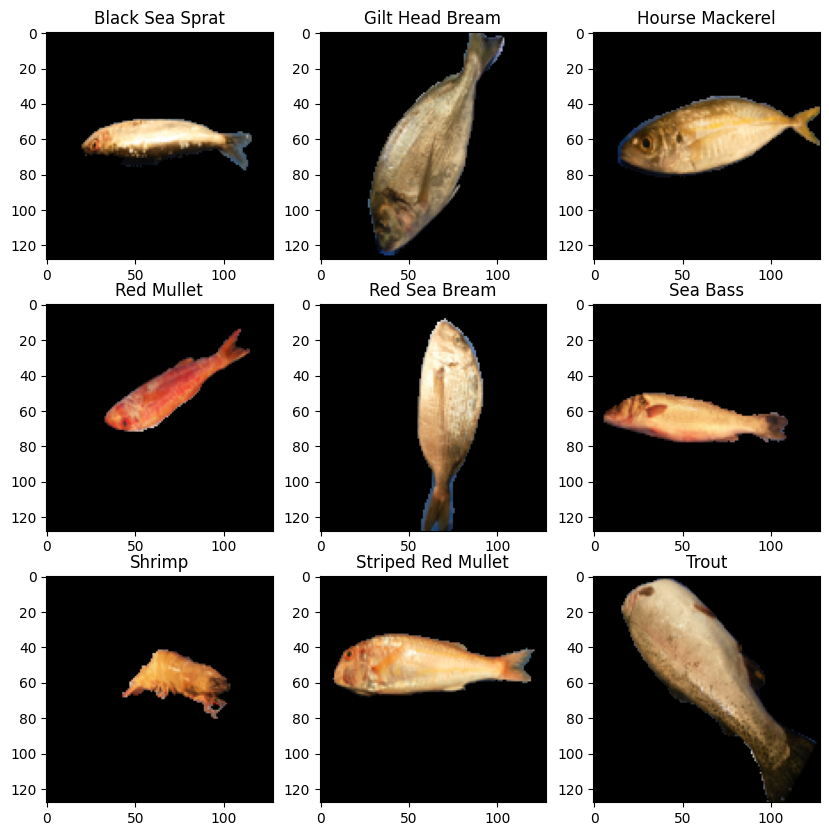

In [400]:
plt.figure(figsize=(10, 10))
# Thay thế bằng nhãn (label) bạn muốn hiển thị

for i, label in enumerate(classes):
    plt.subplot(3, 3, i+1)
    # Lọc dữ liệu theo nhãn
    filtered_data = [item for item in data if item[1] == label]
    # Chọn một ảnh ngẫu nhiên từ dữ liệu đã lọc
    random_image = filtered_data[np.random.randint(len(filtered_data))][0]
    plt.imshow(random_image)
    plt.title(label)

plt.show()


In [401]:
# shuffle data_test
import random
random.seed(42)
random.shuffle(data)

In [402]:
# tạo image và label từ data_test
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)
images = np.array(images)
labels = np.array(labels)

In [403]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [404]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(900, 128, 128, 3)

In [405]:
h = images.shape[1] # chiều cao của ảnh
w = images.shape[2] # chiều rộng của ảnh
c = images.shape[3] # số kênh màu của ảnh

In [406]:
labels

array([0, 8, 4, 4, 5, 8, 2, 5, 3, 4, 1, 2, 0, 3, 5, 5, 5, 6, 3, 1, 8, 3,
       5, 5, 8, 6, 3, 8, 5, 7, 8, 2, 0, 8, 5, 1, 3, 3, 4, 6, 7, 3, 1, 3,
       6, 0, 6, 3, 6, 5, 3, 4, 6, 4, 2, 2, 8, 5, 6, 4, 5, 8, 8, 2, 7, 5,
       8, 1, 6, 4, 5, 0, 1, 5, 1, 2, 6, 4, 0, 0, 8, 6, 3, 2, 2, 2, 5, 7,
       0, 7, 6, 4, 6, 6, 8, 8, 0, 6, 4, 7, 2, 4, 3, 6, 8, 4, 6, 2, 4, 1,
       3, 7, 5, 4, 3, 7, 8, 8, 4, 5, 6, 3, 4, 4, 1, 0, 7, 7, 8, 1, 3, 1,
       6, 0, 7, 8, 4, 0, 2, 5, 0, 8, 6, 2, 1, 8, 6, 3, 8, 7, 7, 8, 2, 3,
       4, 0, 4, 2, 0, 5, 2, 7, 5, 4, 4, 0, 0, 8, 4, 3, 0, 5, 7, 5, 5, 0,
       7, 8, 1, 3, 4, 5, 4, 4, 7, 5, 3, 8, 7, 0, 6, 7, 4, 1, 3, 1, 4, 7,
       8, 4, 8, 6, 2, 0, 1, 8, 6, 1, 7, 3, 2, 6, 5, 6, 8, 3, 3, 0, 7, 3,
       2, 1, 1, 5, 8, 6, 8, 2, 1, 4, 6, 7, 5, 3, 1, 8, 2, 6, 0, 1, 1, 4,
       2, 3, 3, 2, 6, 8, 5, 1, 1, 0, 8, 6, 0, 4, 0, 3, 5, 7, 5, 0, 8, 3,
       1, 3, 4, 0, 7, 1, 6, 6, 3, 5, 1, 1, 6, 3, 5, 8, 7, 4, 2, 3, 1, 5,
       2, 0, 3, 5, 4, 7, 8, 2, 2, 4, 7, 7, 0, 5, 7,

In [407]:
-----------

SyntaxError: invalid syntax (353815310.py, line 1)

In [ ]:
model = Sequential()



model.add(Conv2D(32, (3,3), input_shape=(h, w, c)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

# model.add(Dense(9))


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1081 (Conv2D)        (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_1083 (B  (None, 126, 126, 32)     128       
 atchNormalization)                                              
                                                                 
 activation_1083 (Activation  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_67 (Dropout)        (None, 63, 63, 32)        0         
                                                     

In [ ]:
feature_vector = model.predict(images)

29/29 [==============================] - 8s 273ms/step


In [ ]:
feature_vector.shape

(900, 2048)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

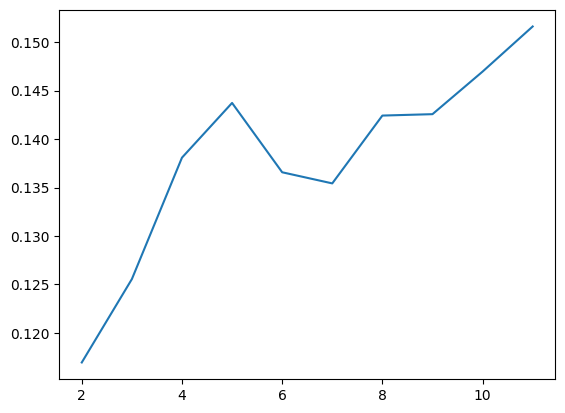

In [ ]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(feature_vector)
    scores.append(silhouette_score(feature_vector, kmeans.labels_))

plt.plot(range(2, 12), scores)

In [ ]:


from sklearn.cluster import MeanShift, estimate_bandwidth
# Xác định độ rộng băng thông (bandwidth) dựa trên dữ liệu
bandwidth = estimate_bandwidth(feature_vector)

# Tạo mô hình Mean Shift với độ rộng băng thông đã xác định
ms = MeanShift(bandwidth=bandwidth)

# Phân cụm dữ liệu
ms.fit(feature_vector)

# Lấy thông tin về các cụm được tìm thấy
label = ms.labels_
centroids = ms.cluster_centers_
n_clusters = len(np.unique(label))

# In ra số cụm tìm được
print("Số cụm tìm được:", n_clusters)

Số cụm tìm được: 1


In [ ]:
from sklearn.cluster import KMeans
n_clusters=9

kmeans = KMeans(n_clusters)
clusters = kmeans.fit_predict(feature_vector)

cluster_centers = kmeans.cluster_centers_


In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(n_clusters):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[2, 16, 14, 10, 1, 37, 8, 0, 45]

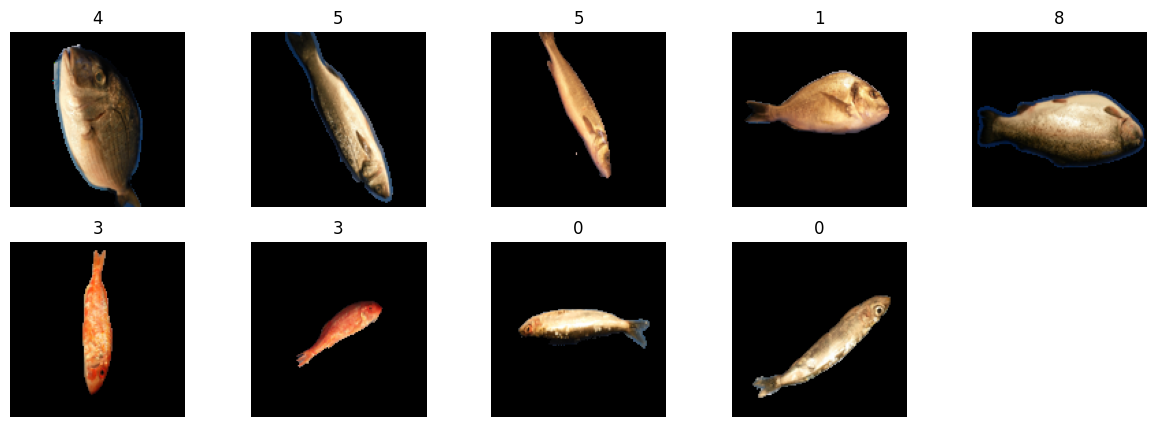

In [ ]:
import matplotlib.pyplot as plt

# Xác định vị trí các ảnh là tâm của các cụm
center_id = []
for i in range(n_clusters):
    center_id.append(np.where(clusters == i)[0][0])

# Vẽ các ảnh là tâm của các cụm
plt.figure(figsize=(15, 5))
for i in range(n_clusters):
    plt.subplot(2, 5, i+1)
    center_image = images[center_id[i]]
    center_image = center_image.reshape((128, 128, 3))
    plt.imshow(center_image)
    plt.axis('off')
    plt.title(labels[center_id[i]])

plt.show()


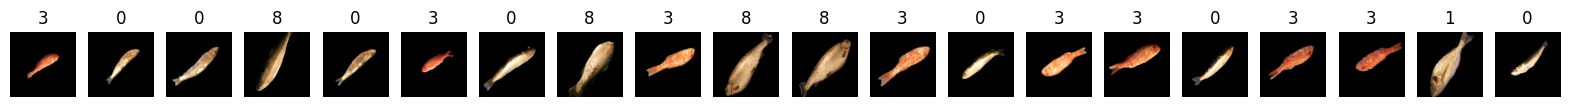

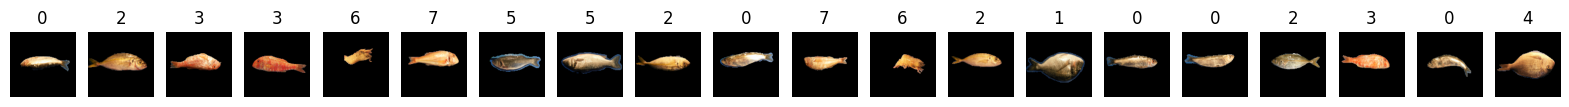

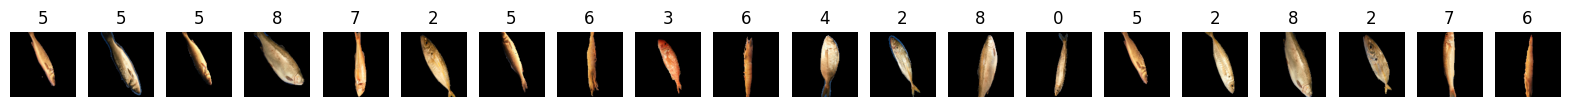

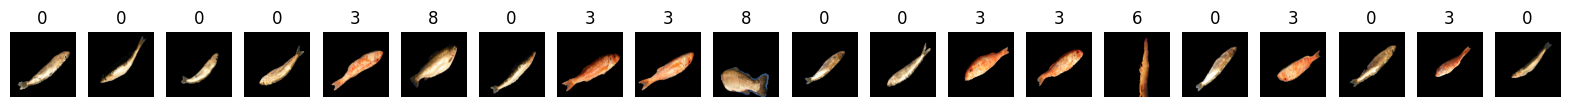

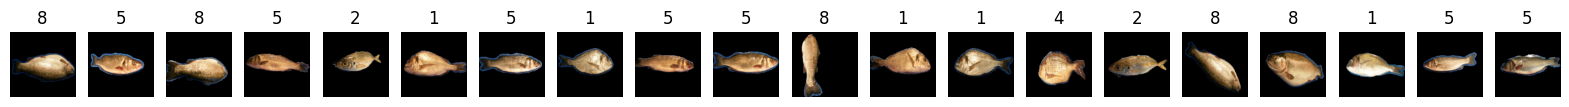

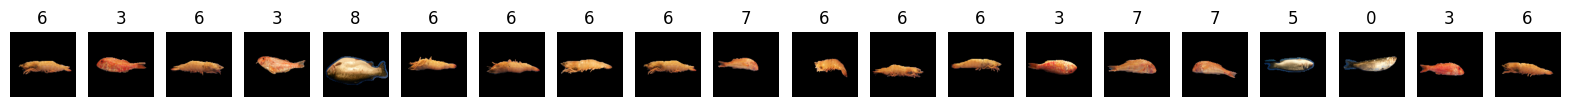

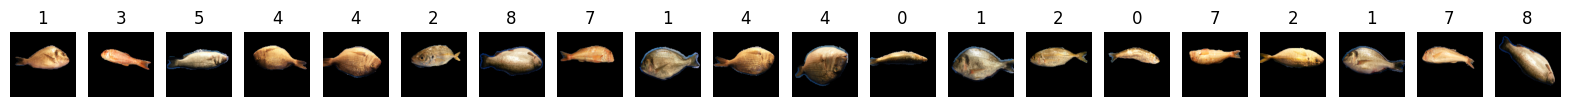

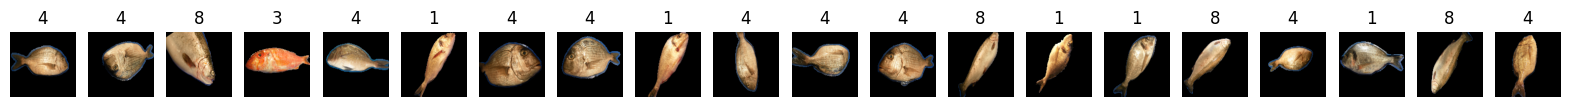

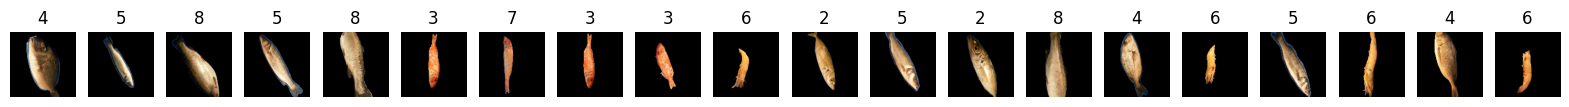

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [ ]:
-------------------

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import keras
from sklearn.cluster import KMeans
from keras.models import Model

In [ ]:
model =   ResNet50(weights='imagenet', include_top=False, input_shape=(h, w,c))

In [ ]:
def extract_vector(data_holder):

    resnet_feature_list = []

    for im in data_holder:

        # im = image.img_to_array(im) 

        img = preprocess_input(np.expand_dims(im, axis=0))

        resnet_feature = model.predict(img)

        resnet_feature_np = np.array(resnet_feature)

        resnet_feature_list.append(resnet_feature_np.flatten())
    return np.array(resnet_feature_list)

In [ ]:
array = extract_vector(images)

1/1 [==============================] - 0s 60ms/step


In [ ]:
array.shape

(900, 32768)

In [ ]:
kmeans = KMeans(n_clusters=9)
# array = array.reshape(array.shape[0],-1)
clusters = kmeans.fit_predict(array)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[30, 2, 0, 1, 8, 45, 29, 15, 24]

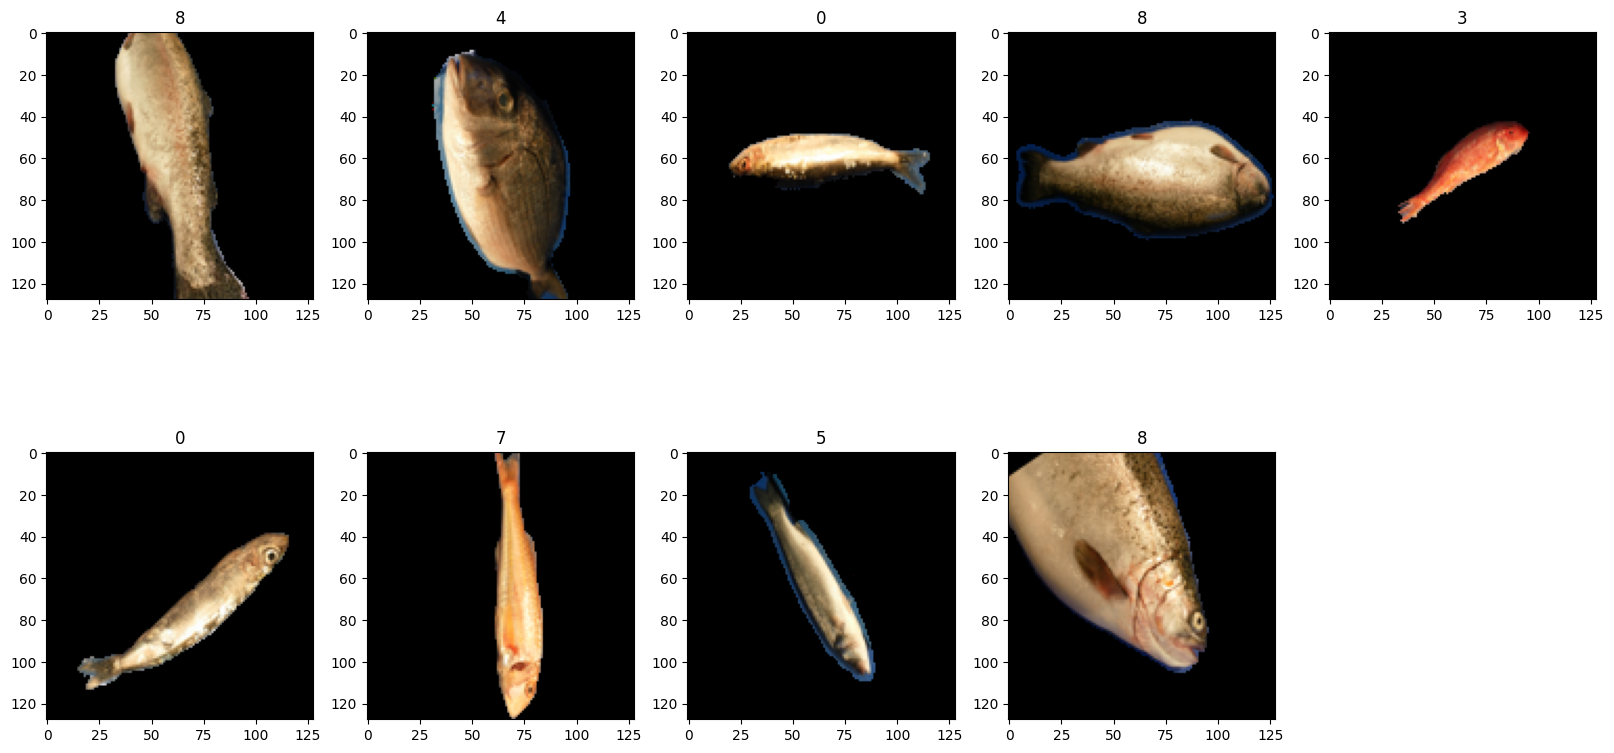

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

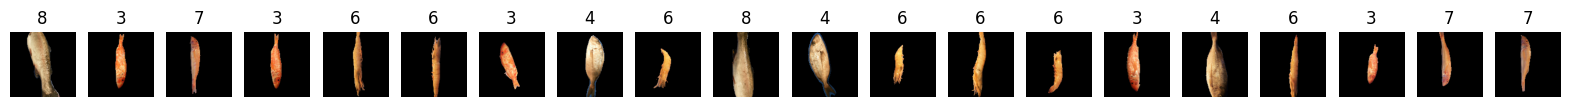

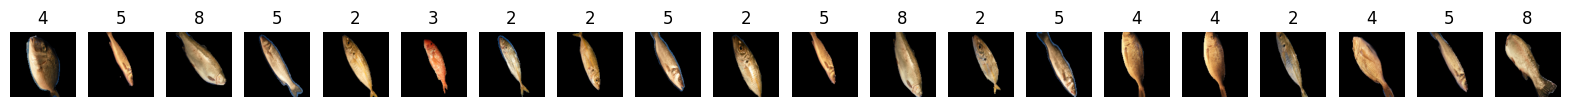

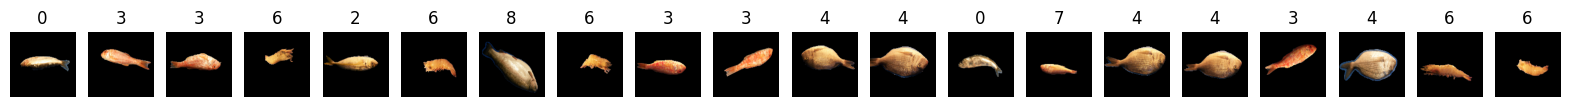

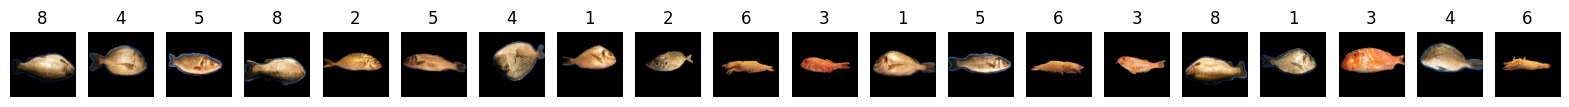

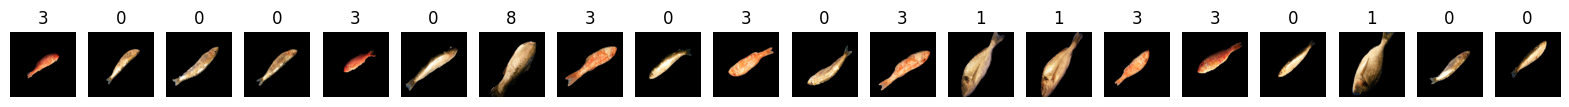

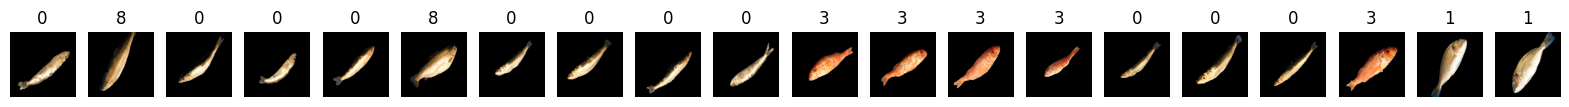

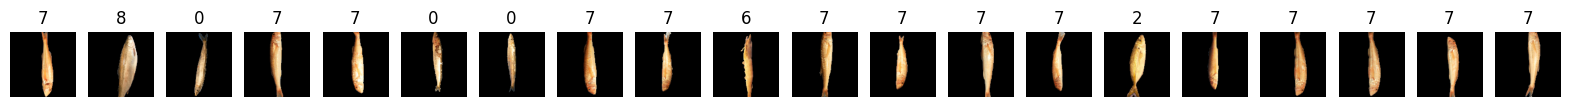

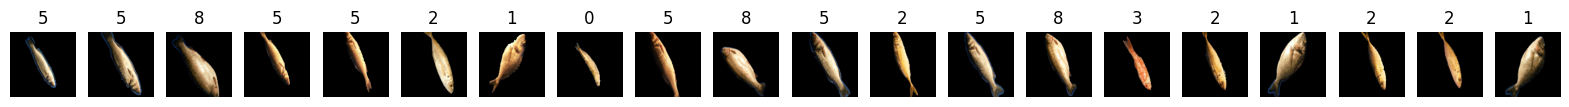

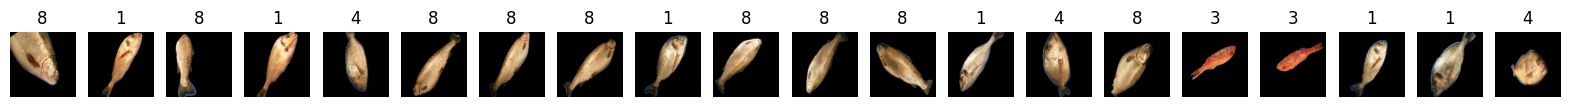

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_indices[0]].reshape(128,128,3))
    plt.title(labels[cluster_indices[0]])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [ ]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

# GOOLENET

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

# Tải cấu trúc GoogLeNet (InceptionResNetV2)
model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(h,w,c))


In [ ]:
feature = model.predict(images)

29/29 [==============================] - 23s 662ms/step


In [ ]:
feature.shape

(900, 2, 2, 1536)

In [ ]:
feature = feature.reshape(feature.shape[0],-1)

In [ ]:
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(feature)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[8, 29, 16, 3, 1, 0, 5, 42, 14]

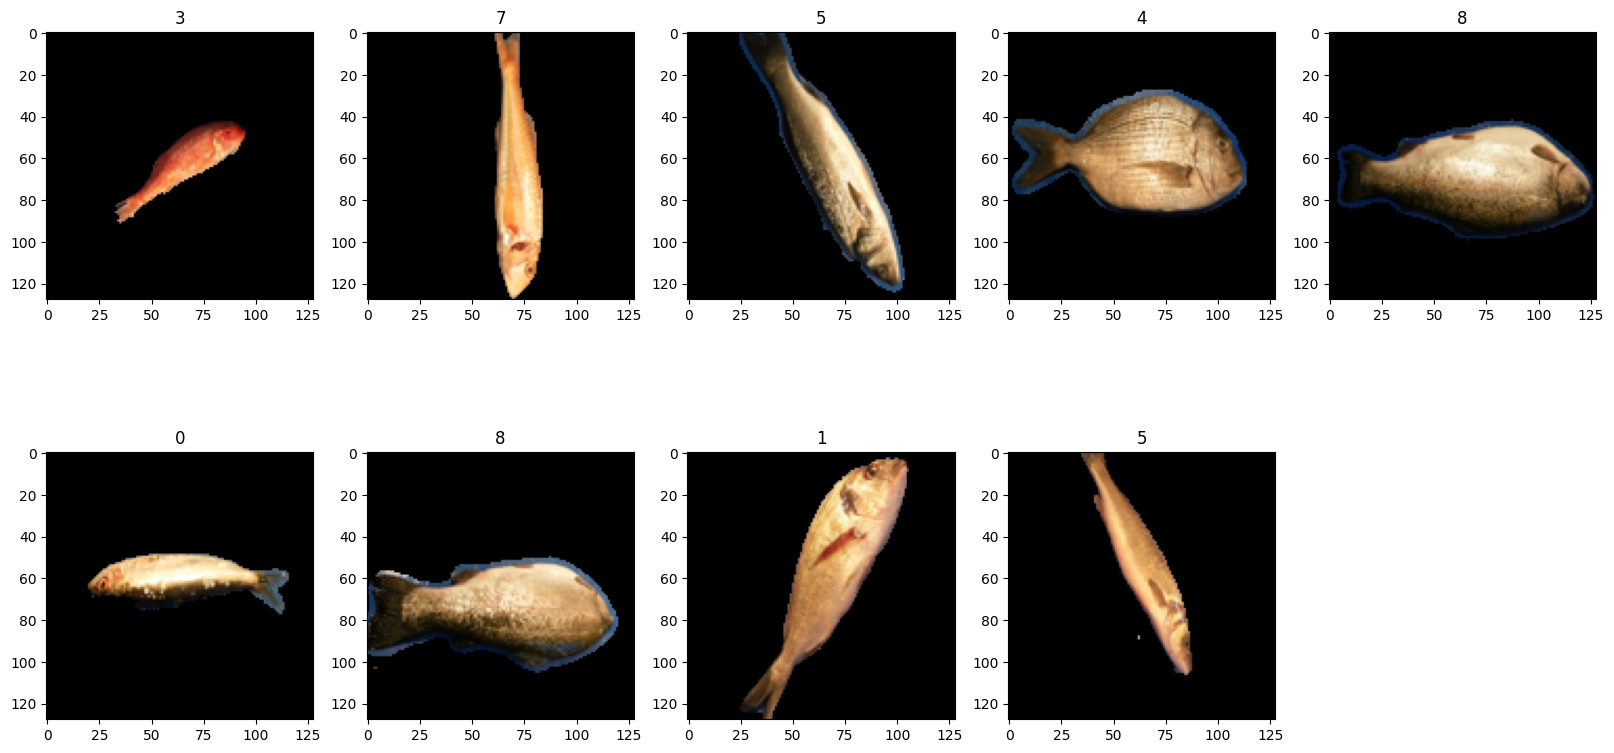

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

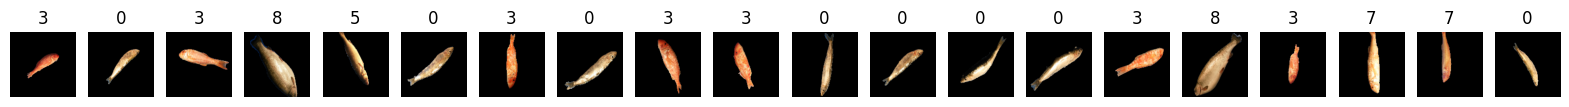

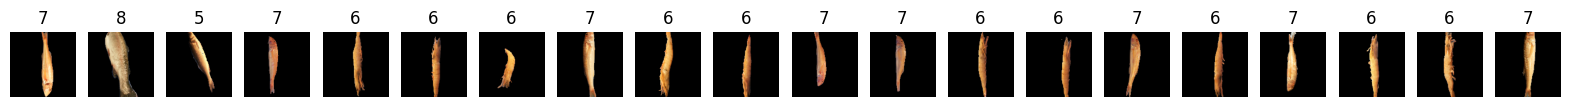

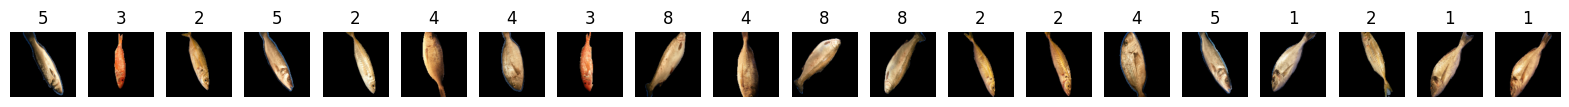

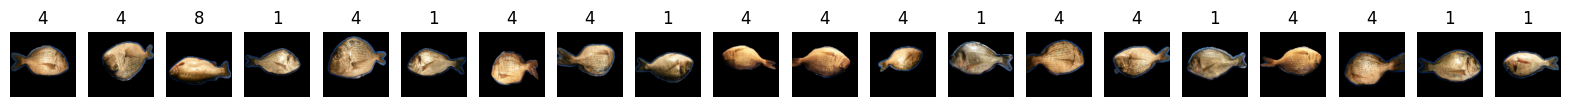

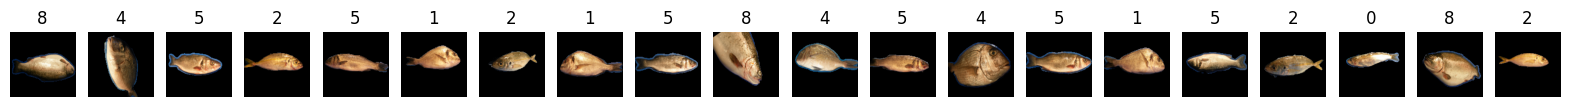

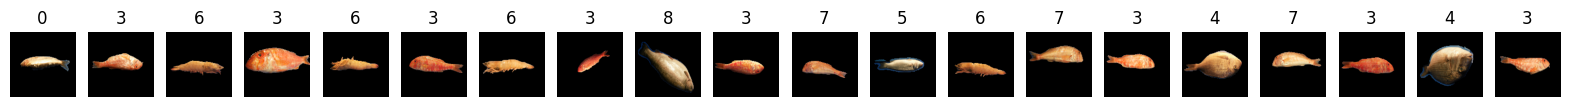

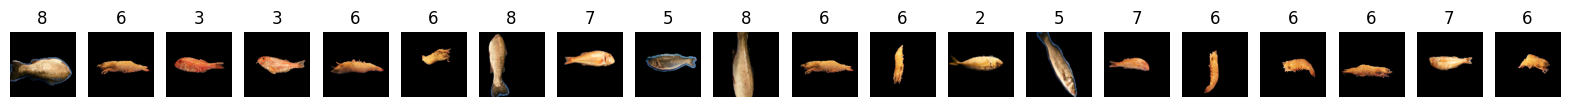

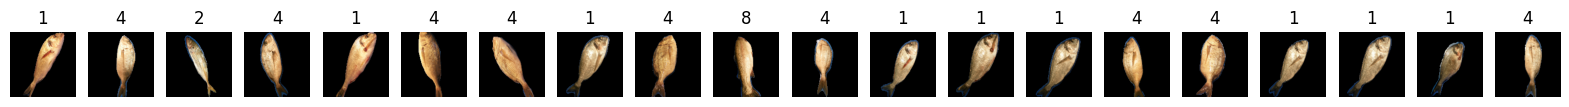

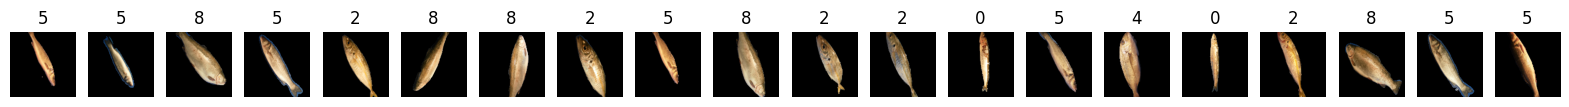

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

# mô hinnhf kết hợp


In [430]:
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetB0,VGG19, NASNetLarge, ResNet152V2, MobileNetV3Large, Xception, InceptionV3, MobileNetV2, DenseNet169, ResNetRS152

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
import tensorflow as tf

# Define the input shape
input_shape = (128, 128, 3)

# Create the input tensor
input_tensor = Input(shape=input_shape)

# Create the MobileNetV3 model
mobilenet_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Create the EfficientNet model
efficientnet_model = ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=False)


# efficientnet_model1 =VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)



# Extract features using MobileNetV3
mobilenet_features = mobilenet_model.output
mobilenet_features = GlobalAveragePooling2D()(mobilenet_features)

# Extract features using EfficientNet
efficientnet_features = efficientnet_model.output
efficientnet_features = GlobalAveragePooling2D()(efficientnet_features)

# efficientnet_features1 = efficientnet_model1.output
# efficientnet_features1= GlobalAveragePooling2D()(efficientnet_features1)
# Concatenate the features
# combined_features = tf.keras.layers.concatenate([mobilenet_features,  efficientnet_features, efficientnet_features1])
combined_features = tf.keras.layers.concatenate([mobilenet_features,  efficientnet_features])
# Create the combined model for feature extraction
combined_model = Model(inputs=input_tensor, outputs=combined_features)


In [431]:
feature = combined_model.predict(images)

29/29 [==============================] - 59s 2s/step


In [432]:
feature.shape

(900, 3328)

In [433]:
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(feature)

In [434]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[16, 1, 22, 12, 51, 0, 17, 2, 28]

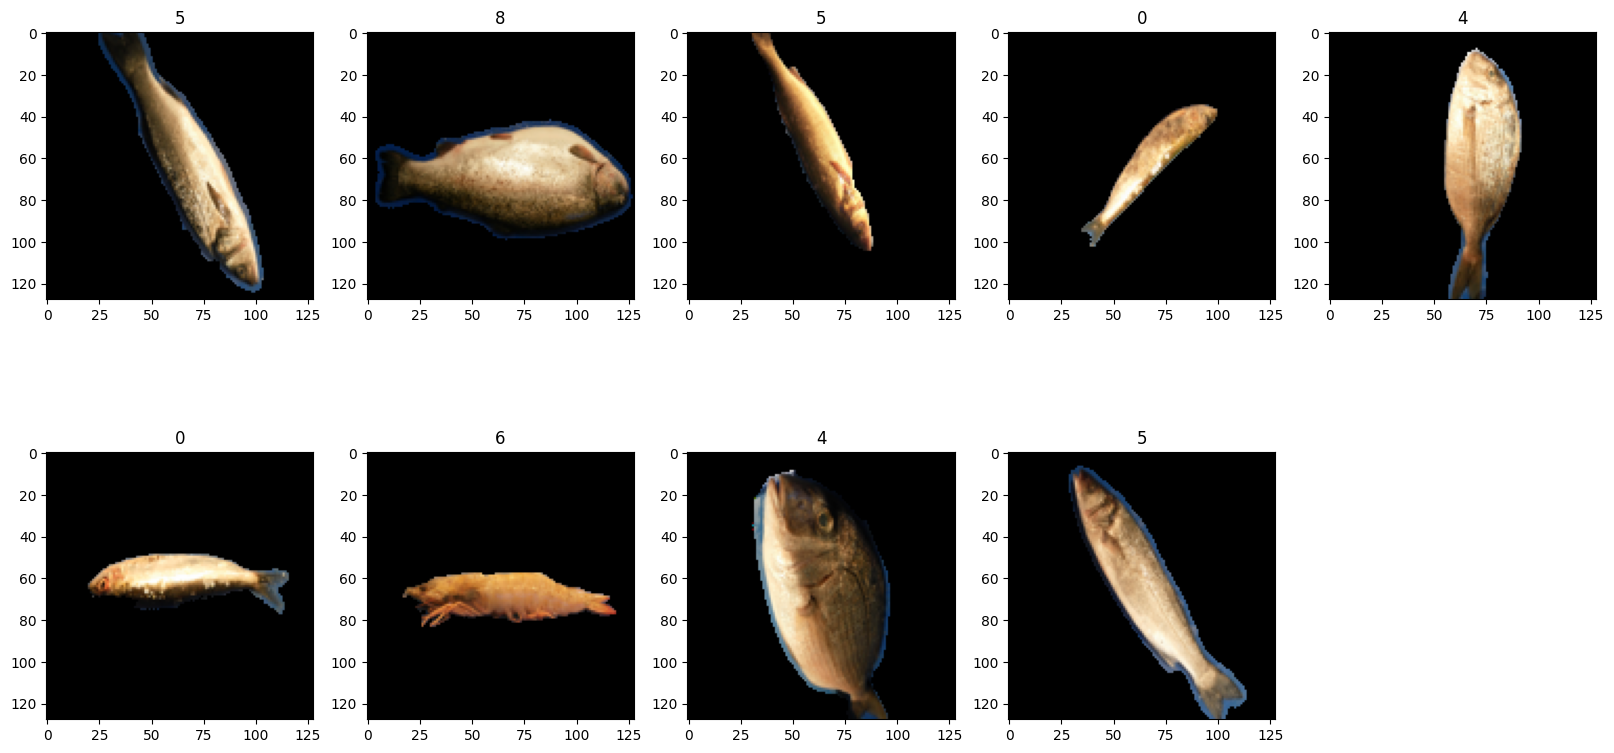

In [435]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

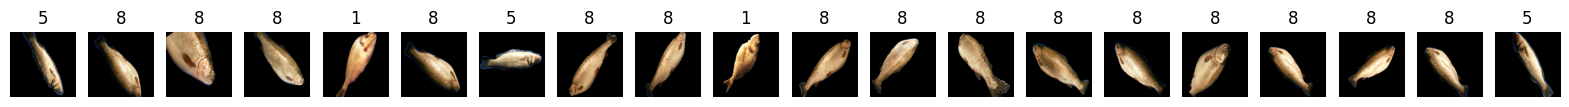

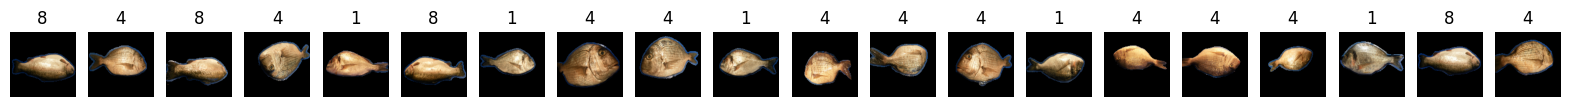

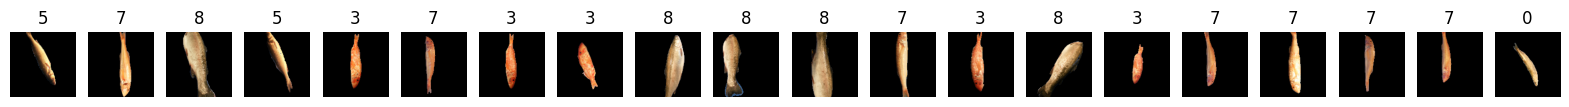

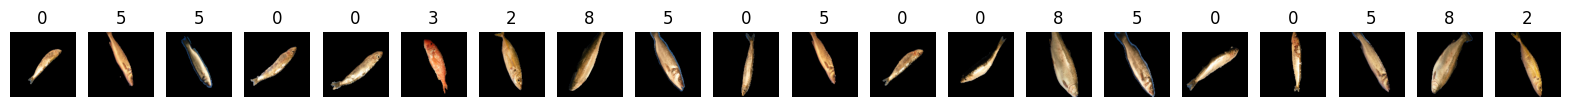

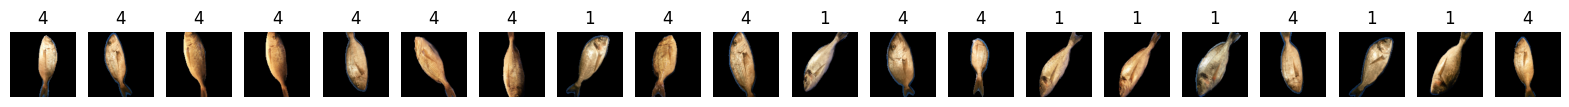

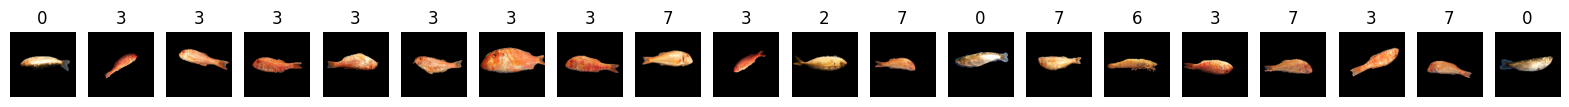

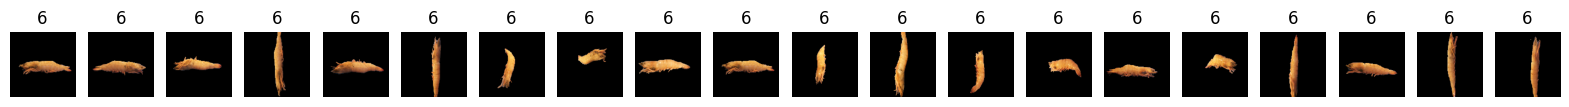

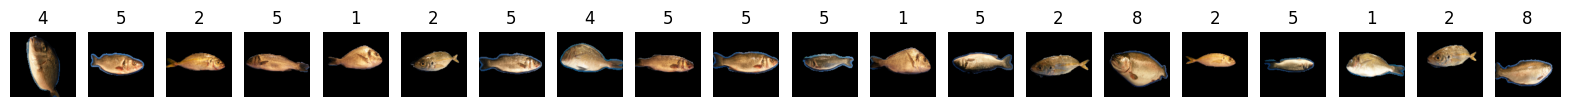

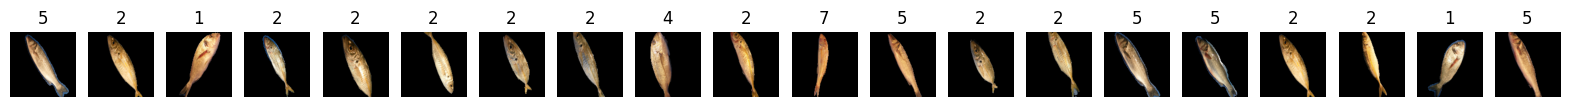

In [436]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_indices[0]].reshape(128,128,3))
    plt.title(labels[cluster_indices[0]])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

# .------
-